# Describe

#### What   is   the   general   type   of   the   data？

The general type of the data is tabular.  
There are 31 columns:  
'AccusedRef' repesenting 'Unique identifier - initials plus system number'  
'AccusedSystemId' repesenting 'Initials ofrecord  creator'   
'AccusedID' repesenting 'System number'      
'FirstName' repesenting 'First name as given in the source'  
'LastName' repesenting 'Surname as given in the source'  
'M_Firstname' repesenting 'Standard modern first name'  
'M_Surname' repesenting 'Standard modern first name'  
'Alias' repesenting 'Standard modern first name'  
'Patronymic' repesenting 'Patronymic'  
'DesTitle' repesenting 'Designation or Title'  
'Sex' repesenting 'Sex of the accused'  
'Age' repesenting 'Age at time of case'  
'Age_estcareer' repesenting 'Indicates that age has been estimated from career'  
'Age_estchild' repesenting 'Indicates that age has been estimated from the existence of children'  
'Res_settlement' repesenting 'Place of residence - settlement'  
'Res_parish' repesenting 'Place of residence - parish'  
'Res_presbytery' repesenting 'Place of residence - presbytery'  
'Res_county' repesenting 'Place of residence - county'  
'Res_burgh' repesenting 'Place of residence - burgh'  
'Res_NGR_Letters' repesenting 'Grid reference of place of residence - letters'  
'Res_NGR_Easting' repesenting 'Grid reference of place of residence - easting'  
'Res_NGR_Northing' repesenting 'Grid reference of place of residence - northing'  
'Ethnic_origin' repesenting 'Ethnic origin'  
'MaritalStatus' repesenting 'Marital status'  
'SocioecStatus' repesenting 'Socio-economic status'  
'Occupation' repesenting 'Occupation'  
'Notes' repesenting 'Notes on the accused'  
'Createdby' repesenting 'Name of person who created this record'  
'Createdate' repesenting 'Date record created'  
'Lastupdatedby' repesenting 'Name of person who last updated the record'  
'Lastupdatedon' repesenting 'Date record last updated'  

In [16]:
import pandas as pd
data = pd.read_csv("WDB_Accused.csv")
print(data.head())

   AccusedRef AccusedSystemId  AccusedID  FirstName    LastName M_Firstname  \
0    A/EGD/10             EGD         10     Mareon     Quheitt      Marion   
1   A/EGD/100             EGD        100       Thom    Cockburn      Thomas   
2  A/EGD/1000             EGD       1000  Christian  Aitkenhead   Christine   
3  A/EGD/1001             EGD       1001      Janet     Ireland       Janet   
4  A/EGD/1002             EGD       1002      Agnes  Hendersoun       Agnes   

   M_Surname Alias Patronymic DesTitle         ...          Res_NGR_Northing  \
0      White   NaN        NaN      NaN         ...                       NaN   
1   Cockburn   NaN        NaN      NaN         ...                       NaN   
2  Aikenhead   NaN        NaN      NaN         ...                       NaN   
3    Ireland   NaN        NaN      NaN         ...                       NaN   
4  Henderson   NaN        NaN      NaN         ...                       NaN   

   Ethnic_origin  MaritalStatus  SocioecStat

#### How many rows and columns are in the dataset?

There are 3219 rows and 31 columns in the dataset.

In [17]:
print(data.shape)

(3219, 31)


#### What is the size of the dataset?

In [18]:
print(data.size)

99789


#### How many withches were accused and how many males and females?

In [19]:
import numpy as np 

print(data['AccusedRef'].shape[0], 'witches are accused')

datamale=data.loc[(data['Sex'] =='Male')] 
datafemale=data.loc[(data['Sex'] =='Female')] 
datasexunknow=data.shape[0]-datamale.shape[0]-datafemale.shape[0]

print(datamale.shape[0], 'were males.')
print(datafemale.shape[0], 'were females.')
print(datasexunknow, 'people‘s gender remained unknow.')

3219 witches are accused
468 were males.
2702 were females.
49 people‘s gender remained unknow.


#### How many witches do we know their age? What is the max/min/average age?

In [20]:
dataage=data.loc[(data['Age'] >0)] 
print(dataage.shape[0], 'witches we know their age.')

print('Among the witches we know of age, the youngest is :',np.min(dataage['Age'])) 
print('Among the witches we know of age, the oldest is :',np.max(dataage['Age'])) 
print('Among the witches we know of age, the average is :', int(np.mean(dataage['Age'])) )

166 witches we know their age.
Among the witches we know of age, the youngest is : 9.0
Among the witches we know of age, the oldest is : 100.0
Among the witches we know of age, the average is : 43


#### How many males and females among those witches and if we set child of the age under 16, how many children?   


#### What interesting information have found in the Children?

In [21]:
def male_famle_child(witches):
    age,sex = witches
     
    if age < 16:
        return "Child"
    else:
        return sex

data["Person"] = data[["Age","Sex"]].apply(male_famle_child,axis=1)
count=data["Person"].value_counts()
print(count)

datachild=data.loc[(data['Person'] =='Child')]
print(datachild.loc[:'FirstName' ,'Notes'])

Female    2698
Male       464
Child        8
Name: Person, dtype: int64
328     accused with her parents, age calculated as 14...
759     Daughter of Jonet Mathie, recorded as underage...
1695    Described as a damsel. Not the same person as ...
1820    Described as a poor begging boy.  He was a min...
1859       The documents says lx (but very badly written)
2104    his mother was also a witch.  He was not older...
2576    The record says he was 12 at the time of trial...
2878         Joyce had his brother being from Bargarrane.
Name: Notes, dtype: object


#### How the age came from?

In [22]:
data1=dataage.loc[~dataage.Age_estcareer]
print(data1.shape[0], 'witches their ages have been estimated from career')
data2=dataage.loc[~dataage.Age_estchild]
print(data2.shape[0], 'witches their ages have been estimated from the existence of children')

74 witches their ages have been estimated from career
118 witches their ages have been estimated from the existence of children


#### What is the number of witches accused in different counties?

In [23]:
dcounty=pd.crosstab(data.Res_county,data.Sex, margins=True)
dcounty.sort_values(by='Female', inplace=True)
print(dcounty)

Sex            Female  Male   All
Res_county                       
Kincardine          0     2     2
Cromarty            2     0     2
Argyll              4     2     6
Kinross             5     2     7
Banff               6     2     8
Sutherland         12     3    15
Wigtown            13     1    14
Selkirk            16     5    21
Clackmannan        16     2    18
Dunbarton          21     4    25
Shetland           21     6    27
Elgin              24     4    28
Inverness          32    10    42
Kirkcudbright      34     1    35
Caithness          38    11    49
Bute               44     8    52
Stirling           45     8    53
Nairn              45    10    55
Roxburgh           49    11    60
Ross               57    14    71
Orkney             62     9    71
Peebles            68    21    89
Forfar             68    11    79
Dumfries           69     9    78
Lanark             72     5    77
Perth              91    14   105
Renfrew            99    24   123
Berwick       

####  What is the number of witches accused from different maritalstatus?

In [24]:
dmaritalstatus=pd.crosstab(data.MaritalStatus,data.Sex, margins=True)
dmaritalstatus.sort_values(by='Female', inplace=True)
print(dmaritalstatus)

Sex              Female  Male  All
MaritalStatus                     
/                     1     0    1
Irregular union       2     0    2
Unknown               3     0    3
Single               11     5   16
Widowed             140     0  140
Married             497    78  575
All                 654    83  737


#### What are the count of the Firstname of those withces?

In [25]:
count=data["FirstName"].value_counts()
print(count)

Margaret                              378
Jonet                                 195
Janet                                 190
Agnes                                 176
Bessie                                138
Marion                                106
Issobell                               98
John                                   90
Helen                                  86
Elspeth                                72
Katherine                              60
Christian                              58
Unknown                                48
William                                48
Jonnet                                 44
James                                  42
Jean                                   42
Marioun                                38
Elizabeth                              38
Thomas                                 37
Isobel                                 36
Barbara                                34
Margret                                33
Elspet                            

# Explore

#### What is the distribution of age?

The age is mainly distributed in the range from 40 (years old) to 60 (years old), especially at around 50 (years old).

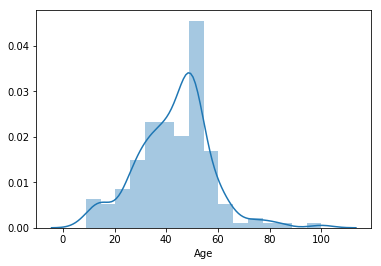

In [26]:
%matplotlib inline 

import seaborn as sns 
import matplotlib.pyplot as plt 

sns.distplot(dataage['Age'])
plt.show()   

#### What is the proportion of different people, including female, male and child?

The proportion of female, male and child is 85.1%, 14.6% and 0.3%. 

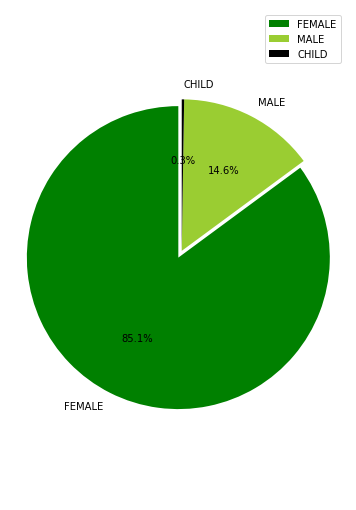

In [27]:
plt.figure(figsize=(6,9))

labels = [u'FEMALE', u'MALE', u'CHILD']

sizes = [2698,464,8]
colors = ['green','yellowgreen','black']

explode = (0.05,0,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)

for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)

plt.axis('equal')
plt.legend()
plt.show()


#### What is the number of witches accused in different counties?

Generally speaking, they are the top three numbers of witches accused in the Haddington, Fife and Edinburgh. 


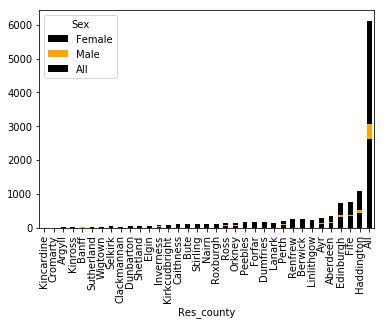

In [28]:
dcounty.plot(kind='bar',stacked=True, color=['black','orange'])
plt.show() 

#### Does the number of withes accused have relationship with the SocioecStatus?

Most of the withches accused are in the Middling and Lower of the SocioecStatus

<function matplotlib.pyplot.show>

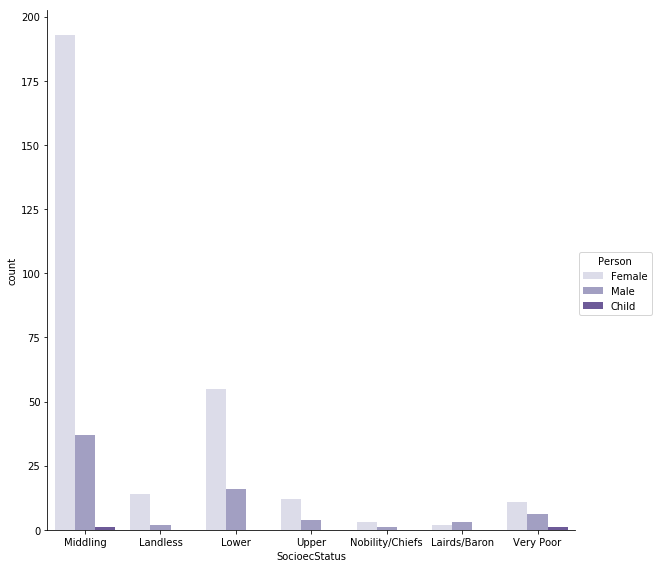

In [29]:
sns.factorplot('SocioecStatus',data=data,palette='Purples', kind="count",hue="Person", size=8)
plt.show

#### What is the relationship between maritalStatus, age and sex?

Most of the witches accused are married or widowed. At the same time, they were in the Middling SocioecStatus.

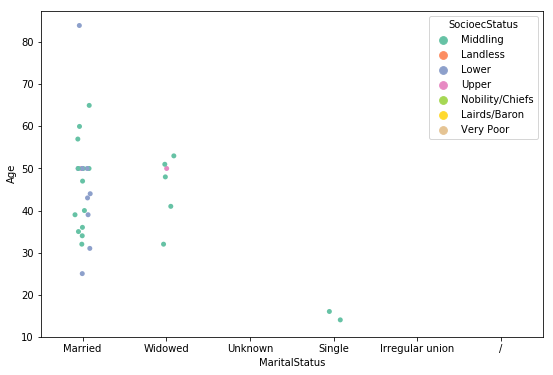

In [30]:
plt.figure(figsize=(9,6))
sns.stripplot(x='MaritalStatus',y='Age',hue='SocioecStatus', jitter=True, data=data, palette="Set2", size=5)
plt.show()

# Reflection 


Through the data analyzing and visualization above, I have found most of the witches accused were women at the number of 2698 and there were some children at the number of 8 among the witches who had a record of age. Since at that time, the social position of females were always below the males. By listing the notes of the children from the csv file, some of them was accused because of their parents who were accused as witches. And not all of the witches accused had a record of age. Most of the witches, no matter males or females were married or widowed, and the numbers of them were 575 and 140. Most of the witches were accused in the county of Edinburgh, Fife and Haddington. The number of them were 370, 379 and 539. Half of the witches accused were in the Middling Socioecstatus. There were lots of information remained unknown so there were blanks in the csv file. We not very clearly know all information of the witches, from this point we can image how guiltless they were.


# Hypothesise


1.	Why most of the witches accused were in the Middling socioecstatus, does it relate to some politic or other things? I will go to know more culture of the background about the witches.
2.	Most of the witches were accused in the county of Edinburgh, Fife and Haddington. There must be something happened at that time in those places, resulting in lots of witches accused. I would like do some research on those places to see what had happened.
3.	There were some popular names like Margaret, Jonet, Janet and Agnes, do it will relate to some family history? Deep research in the history further.
